In [12]:
import numpy as np
%load_ext autoreload
%autoreload 2
import helper_functions as hp
import gc
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import helper_functions as hp

In [14]:
Pocket_images, Pocket_labels = hp.segmented_dataset_reader('PocketN_6_64')
Nuns_images, Nuns_labels = hp.segmented_dataset_reader('NunsN_6_64')
Tubbs_images, Tubbs_labels = hp.segmented_dataset_reader('tubbsN_6_64')

# segmented_naip_images_tif0 = np.copy(segmented_naip_images_tif[:,:,:,0:4])
# myset = {1,2}
# for i in myset:
#     segmented_naip_images_tif0[:,:,:,i] = 0
#
# segmented_naip_images_tif1 = np.copy(segmented_naip_images_tif[:,:,:,0:4])
# myset = {0,2}
# for i in myset:
#     segmented_naip_images_tif1[:,:,:,i] = 0
#
# segmented_naip_images_tif2 = np.copy(segmented_naip_images_tif[:,:,:,0:4])
# myset = {0,1}
# for i in myset:
#     segmented_naip_images_tif2[:,:,:,i] = 0
#
# segmented_naip_images_tif3 = np.copy(segmented_naip_images_tif[:,:,:,0:4])
# myset = {0,1,2}
# for i in myset:
#     segmented_naip_images_tif3[:,:,:,i] = 0

reading in 1437 images
reading in 2732 images
reading in 2028 images


In [15]:
print(Pocket_images.shape, Pocket_labels.shape)
print(Pocket_images.dtype, Pocket_labels.dtype)
print(Nuns_images.shape, Nuns_labels.shape)
print(Nuns_images.dtype, Nuns_labels.dtype)
print(Tubbs_images.shape, Tubbs_labels.shape)
print(Tubbs_images.dtype, Tubbs_labels.dtype)

(1437, 128, 128, 4) (1437, 128, 128)
float32 uint8
(2732, 128, 128, 4) (2732, 128, 128)
float32 uint8
(2028, 128, 128, 4) (2028, 128, 128)
float32 uint8


In [16]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15225808671956191709
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22712156160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 268450619517558701
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:05:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [10]:
from scikeras.wrappers import KerasClassifier

In [7]:
import tensorflow as tf
tf.version.VERSION

'2.10.1'

In [17]:
Pocket_images = Pocket_images[:, :, :, 0:3]
Nuns_images = Nuns_images[:, :, :, 0:3]
Tubbs_images = Tubbs_images[:, :, :, 0:3]

In [18]:
print(np.unique(Pocket_labels, return_counts=True))
print(np.unique(Nuns_labels, return_counts=True))
print(np.unique(Tubbs_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6], dtype=uint8), array([      3, 4878210, 6312870, 5015215, 2596074, 1738316, 3003120],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6], dtype=uint8), array([       8,  7658410,  9130856,  7340214,  4414702,  3562046,
       12654852], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6], dtype=uint8), array([       7,  4494007,  7979964,  4423716,  3002576,  2446991,
       10879491], dtype=int64))


In [19]:
Pocket_labels = np.where(Pocket_labels == 0, Pocket_labels + 1, Pocket_labels) - 1
Nuns_labels = np.where(Nuns_labels == 0, Nuns_labels + 1, Nuns_labels) - 1
Tubbs_labels = np.where(Tubbs_labels == 0, Tubbs_labels + 1, Tubbs_labels) - 1

In [8]:
print(np.unique(Pocket_labels, return_counts=True))
print(np.unique(Nuns_labels, return_counts=True))
print(np.unique(Tubbs_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([ 8385243, 10850611,  8126103,  4145865,  2921696,  4826546],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([ 9315914, 12116444,  9630829,  6389751,  6193628, 30966170],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([ 8299690, 13003887,  7478134,  4885885,  4094499, 17615825],
      dtype=int64))


0.72156864 0.023529412
float32
(128, 128, 3)


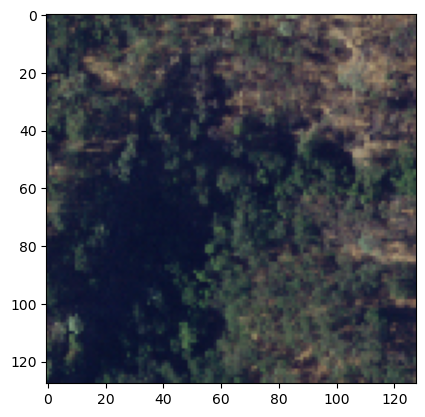

In [20]:
img = Pocket_images[200]
print(img.max(), img.min())
print(img.dtype)
print(img.shape)
plt.imshow(img, vmax=1, vmin=0)

0.7372549 0.10980392
float32
(128, 128, 3)


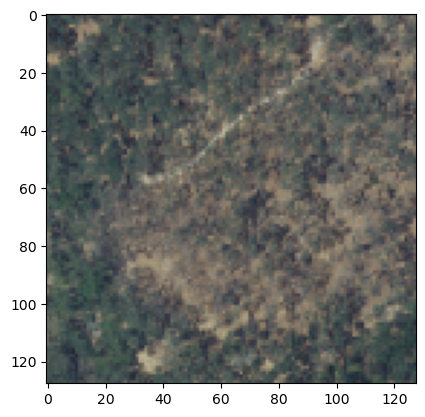

In [34]:
img = Nuns_images[350]
print(img.max(), img.min())
print(img.dtype)
print(img.shape)
plt.imshow(img)

In [23]:
# for j in range(1000,1005):
#     display_list = [segmented_naip_new_labels[j],segmented_naip_images_tif[j,:,:,0:3], segmented_naip_images_tif0[j], segmented_naip_images_tif1[j], segmented_naip_images_tif2[j], segmented_naip_images_tif3[j]]
#     plt.figure(figsize=(15, 15))
#     title = ["Input Image + Mask","Input Image","Input Image 0", "Input Image 1","Input Image 2", "Input Image 3"]
#     plt.subplot(1, len(display_list),1)
#     plt.title(title[0])
#     plt.imshow(display_list[1],vmax=1,vmin=0,interpolation='none')
#     plt.imshow(display_list[0],vmax=3,vmin=0,interpolation='none',alpha=0.6)
#     plt.axis("off")
#     for i in range(1,len(display_list)):
#         plt.subplot(1, len(display_list),i+1)
#         plt.title(title[i])
#         plt.imshow(display_list[i],vmax=1,vmin=0,interpolation='none')
#         plt.axis("off")
#     plt.show()

NameError: name 'segmented_naip_images_tif0' is not defined

(128, 128)
[0 1 2 3 4 5]
5 0
uint8


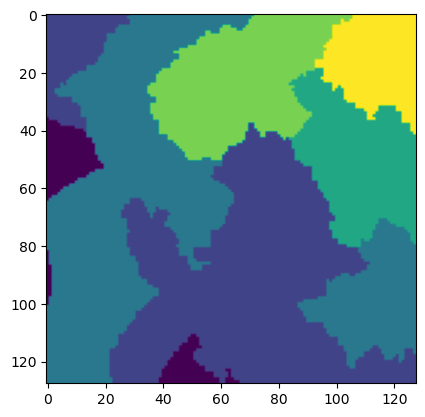

In [35]:
lbl = Pocket_labels[200]
print(lbl.shape)
print(np.unique(lbl))
print(lbl.max(), lbl.min())
print(lbl.dtype)
plt.imshow(lbl)

In [21]:
train_images = np.concatenate((Nuns_images, Tubbs_images), axis=0)
train_labels = np.concatenate((Nuns_labels, Tubbs_labels), axis=0)
test_images = Pocket_images
test_labels = Pocket_labels

In [101]:
train_labels = keras.utils.to_categorical(train_labels,num_classes=6)
test_labels = keras.utils.to_categorical(test_labels,num_classes=6)

In [64]:
search_images = np.concatenate((Nuns_images, Tubbs_images,Pocket_images), axis=0)
search_labels = np.concatenate((Nuns_labels, Tubbs_labels,Pocket_labels), axis=0)

In [41]:
search_labels.shape

(6197, 128, 128)

In [61]:
search_labels = keras.utils.to_categorical(search_labels,num_classes=6)

In [126]:
search_labels.shape

(10330, 128, 128)

In [42]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(search_labels.flatten()), y = search_labels.flatten())

In [44]:
print(class_weights)

[0.99361717 0.7224285  1.00851035 1.68993773 2.18422232 0.63766236]


In [7]:
del Pocket_images
del Pocket_labels
del Nuns_images
del Nuns_labels
del Tubbs_images
del Tubbs_labels

In [ ]:
# train_images, test_images, train_labels, test_labels = train_test_split(segmented_naip_images_tif, segmented_naip_new_labels, test_size=.25, shuffle=False)

In [25]:
print(train_images.shape, train_labels.shape)
print(train_images.dtype, train_labels.dtype)
print(np.unique(train_labels, return_counts=True))
print(test_images.shape, test_labels.shape)
print(test_images.dtype, test_labels.dtype)

(4760, 128, 128, 3) (4760, 128, 128)
float32 uint8
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([12152432, 17110820, 11763930,  7417278,  6009037, 23534343],
      dtype=int64))
(1437, 128, 128, 3) (1437, 128, 128)
float32 uint8


In [71]:
search_labels = search_labels.reshape(-1,128,128,1)

In [72]:
print(search_images.shape)
print(search_labels.shape)

(6197, 128, 128, 3)
(6197, 128, 128, 1)


In [75]:
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
params = {
    'num_class' : [6],
    'weights' : [class_weights],
    'act': ['elu','relu', leaky_relu],
    'drop': [.2,.3, .4],
    'drop2':[.2,.3,.4],
    'drop_bool':[True, False],
    'drop_bool2':[True, False],
    'filter': [16,32, 64],
    'act2': ['elu', 'relu', leaky_relu],
    'gamma' : [1,2,3],
    'lr' : [0.01,0.001,0.0001],
    'opt' : ['adam','Sgd'],

}
model = KerasClassifier(model=hp.build_unet_model,loss="sparse_categorical_crossentropy",num_class=6, weights=class_weights, act='relu', drop=0.3, drop2=0.3, drop_bool=False, drop_bool2=False,
                     filter=16, act2='relu', gamma=2, lr=0.01, opt='adam', epochs=5, verbose=1)
grid = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=1, cv=5, verbose=10, error_score='raise')
grid_results = grid.fit(X=search_images, y=search_labels)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START act=<keras.layers.activation.leaky_relu.LeakyReLU object at 0x0000029DA4976550>, act2=elu, drop=0.2, drop2=0.2, drop_bool=True, drop_bool2=True, filter=16, gamma=3, lr=0.01, num_class=6, opt=adam, weights=[0.99361717 0.7224285  1.00851035 1.68993773 2.18422232 0.63766236]


ValueError: Found array with dim 4. None expected <= 2.

In [38]:
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [ ]:
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
results = pd.DataFrame(grid_results.cv_results_['params'])
results['mean_test_score'] = grid_results.cv_results_['mean_test_score']
results.sort_values(by=['mean_test_score'], ascending=False)

In [27]:
#All my callback are called here
r_lr = hp.reduce_lr()
e_stop = hp.early_stop()
#callbacks = [r_lr, e_stop]
callbacks = e_stop
gc.collect()

1428

In [28]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(train_labels.flatten()), y = train_labels.flatten())

In [29]:
keras.backend.clear_session()
model = hp.build_unet_model(6,class_weights)
model.summary()
gc.collect()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 separable_conv2d (SeparableCon  (None, 128, 128, 16  91         ['input_1[0][0]']                
 v2D)                           )                                                                 
                                                                                                  
 separable_conv2d_1 (SeparableC  (None, 128, 128, 16  416        ['separable_conv2d[0][0]']       
 onv2D)                         )                                                             

659

In [14]:
gc.collect()

465

In [100]:
test_labels.shape

(2396, 128, 128)

In [93]:
history = model.fit(search_images, search_labels, epochs=50, shuffle=True)

KeyboardInterrupt: 

In [104]:
print(train_labels.shape,train_images.shape)
print(test_labels.shape,test_images.shape)

(7934, 128, 128, 6) (7934, 128, 128, 3)
(2396, 128, 128, 6) (2396, 128, 128, 3)


In [30]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32,
                    callbacks=callbacks, shuffle=True)  #beat 0.3770

Epoch 1/50
 76/149 [==============>...............] - ETA: 4s - loss: 0.8445 - accuracy: 0.4546

KeyboardInterrupt: 

In [13]:
model.save('simple_seg_model_full_6class_NunsTubbs.tf', overwrite=True)
#model= keras.models.load_model("simple_seg_model.h5")

INFO:tensorflow:Assets written to: simple_seg_model_full_6class_NunsTubbs.tf\assets


INFO:tensorflow:Assets written to: simple_seg_model_full_6class_NunsTubbs.tf\assets


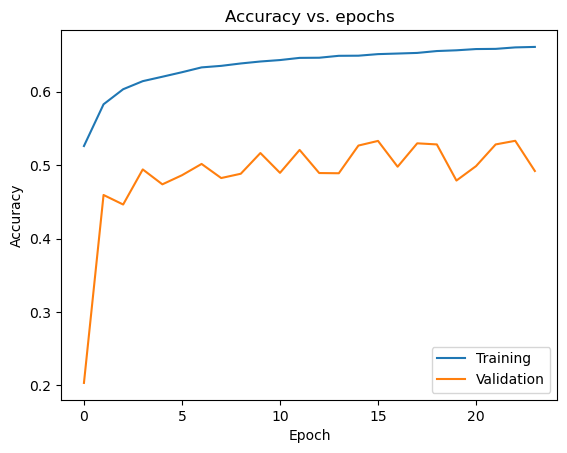

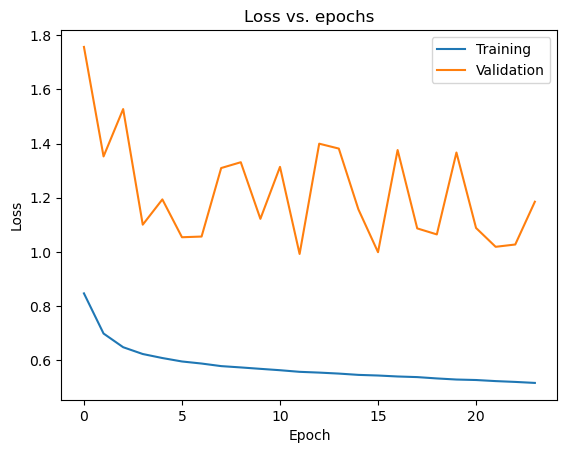

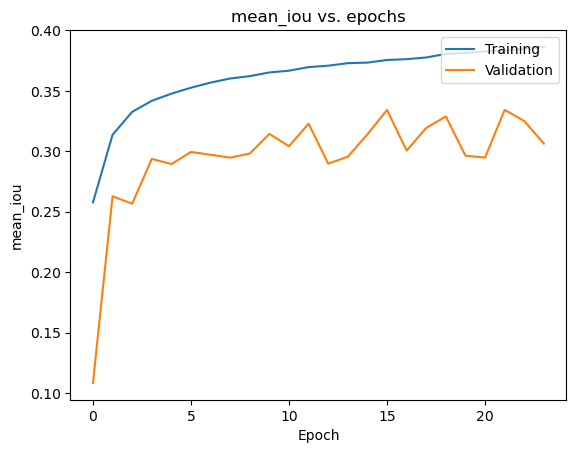

In [13]:
hp.plot_accuracy(history)
hp.plot_loss(history)
hp.plot_meaniou(history)

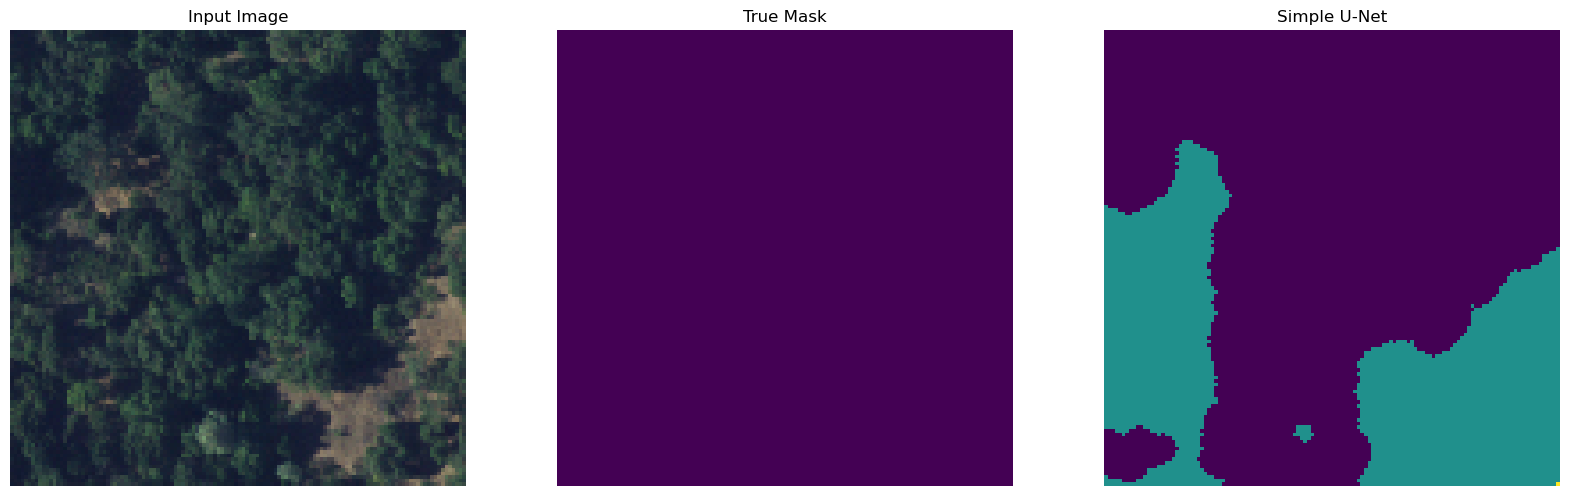

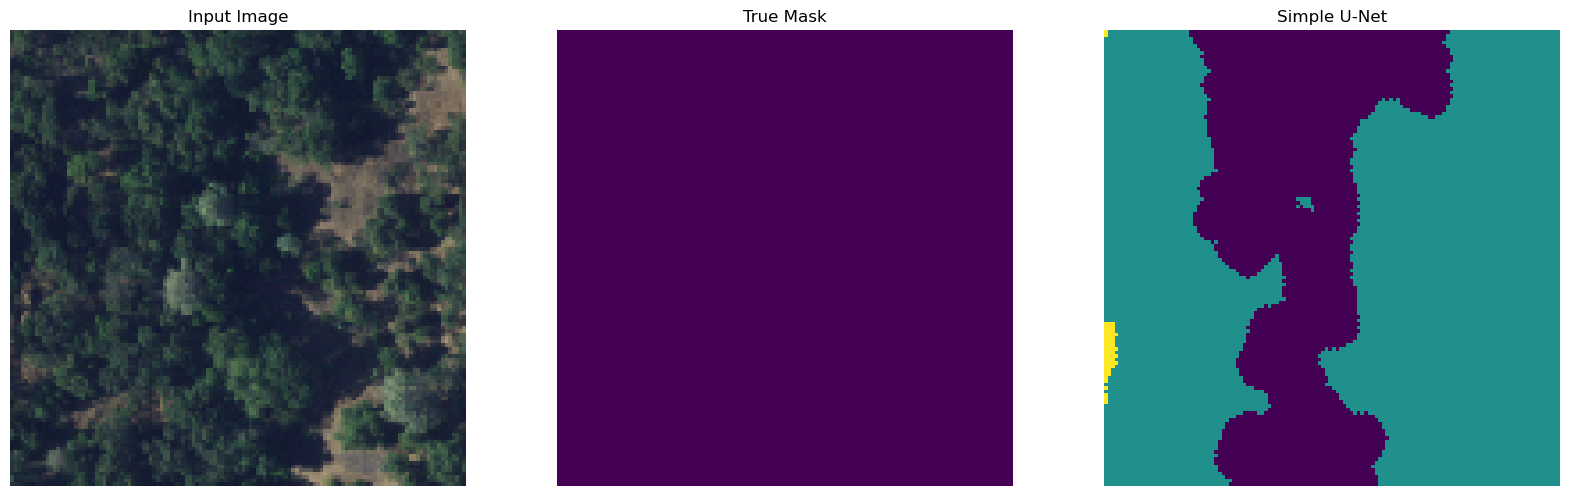

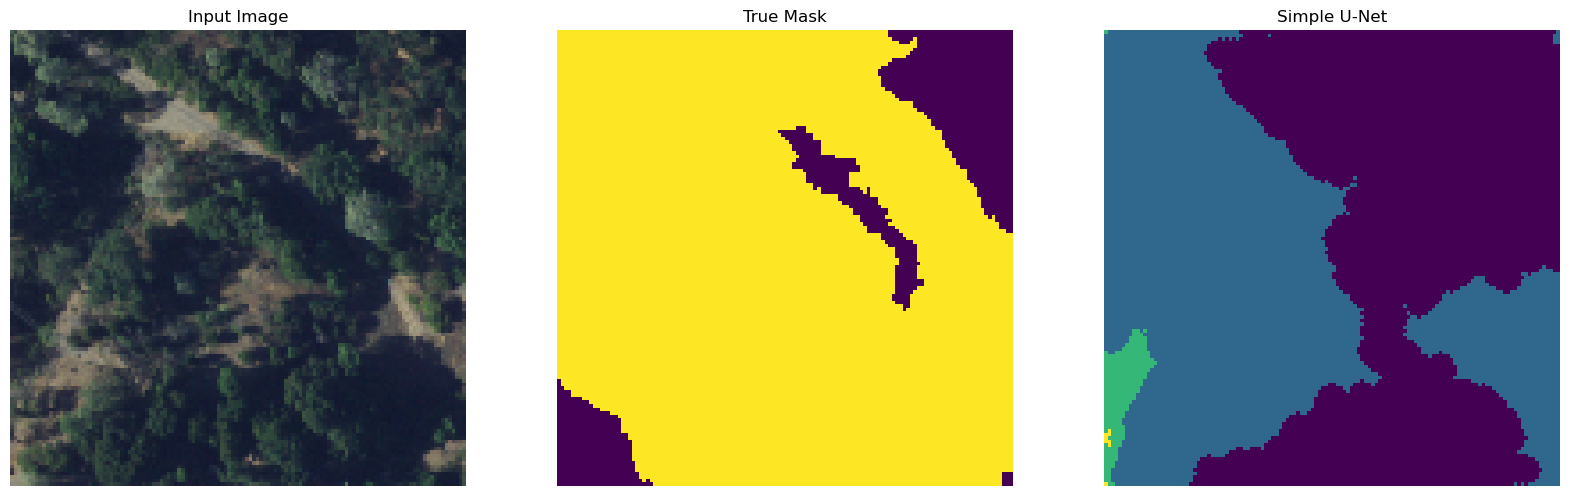

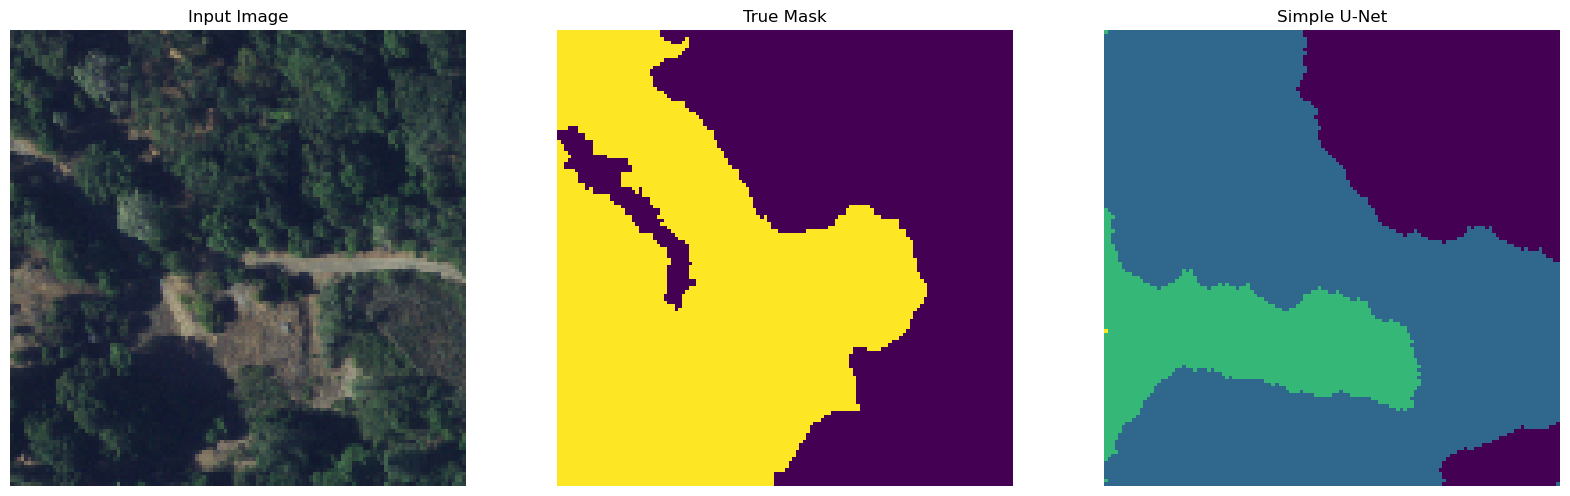

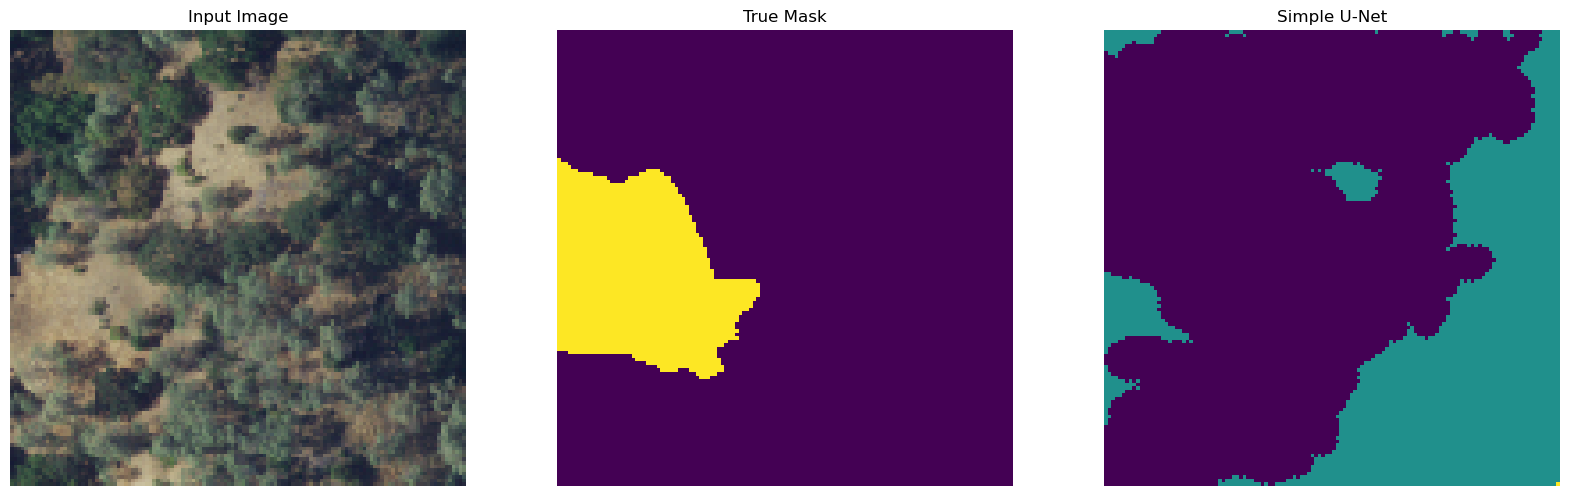

In [14]:
hp.show_predictions(model, test_images[100:105], test_labels[100:105], 5, "Simple U-Net")
#del model

In [15]:
keras.backend.clear_session()
model_mobile = hp.mobile_unet_model(output_channels=6, weights=class_weights)
model_mobile.summary()
gc.collect()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_1[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                          

40354

In [16]:
gc.collect()

0

In [17]:
history_mobile = model_mobile.fit(train_images, train_labels, epochs=50, batch_size=32,
                                  validation_data=(test_images, test_labels),
                                  callbacks=callbacks, shuffle=True)  #.3175

Epoch 1/50
744/744 [==============================] - 25s 31ms/step - loss: 0.8689 - accuracy: 0.5323 - mean_io_u: 0.2629 - val_loss: 1.2670 - val_accuracy: 0.4160 - val_mean_io_u: 0.2527
Epoch 2/50
744/744 [==============================] - 21s 28ms/step - loss: 0.7291 - accuracy: 0.5823 - mean_io_u: 0.3065 - val_loss: 1.2118 - val_accuracy: 0.4571 - val_mean_io_u: 0.2659
Epoch 3/50
744/744 [==============================] - 21s 28ms/step - loss: 0.7052 - accuracy: 0.5894 - mean_io_u: 0.3139 - val_loss: 1.2339 - val_accuracy: 0.4404 - val_mean_io_u: 0.2669
Epoch 4/50
744/744 [==============================] - 21s 28ms/step - loss: 0.6940 - accuracy: 0.5924 - mean_io_u: 0.3177 - val_loss: 1.2054 - val_accuracy: 0.4530 - val_mean_io_u: 0.2740
Epoch 5/50
744/744 [==============================] - 21s 28ms/step - loss: 0.6845 - accuracy: 0.5971 - mean_io_u: 0.3213 - val_loss: 1.2061 - val_accuracy: 0.4534 - val_mean_io_u: 0.2744
Epoch 6/50
744/744 [==============================] - 21s 28

In [65]:
#model_mobile = keras.models.load_model("mobilenet_seg_model_full.tf")

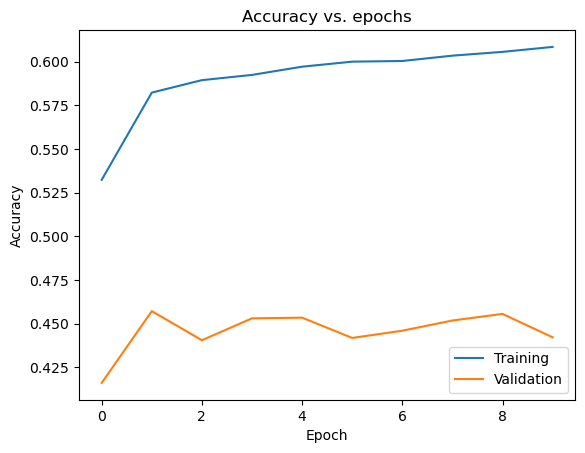

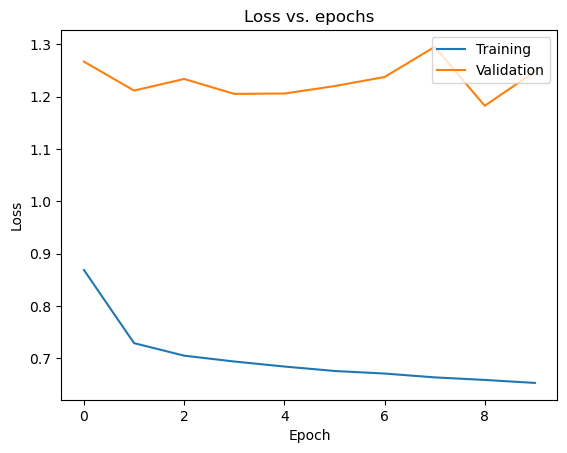

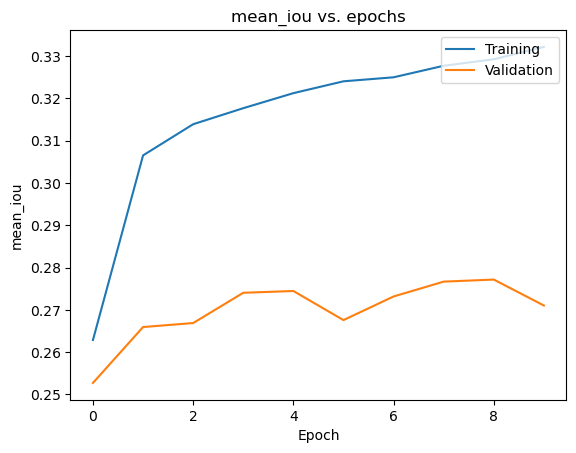

In [18]:
hp.plot_accuracy(history_mobile)
hp.plot_loss(history_mobile)
hp.plot_meaniou(history_mobile)

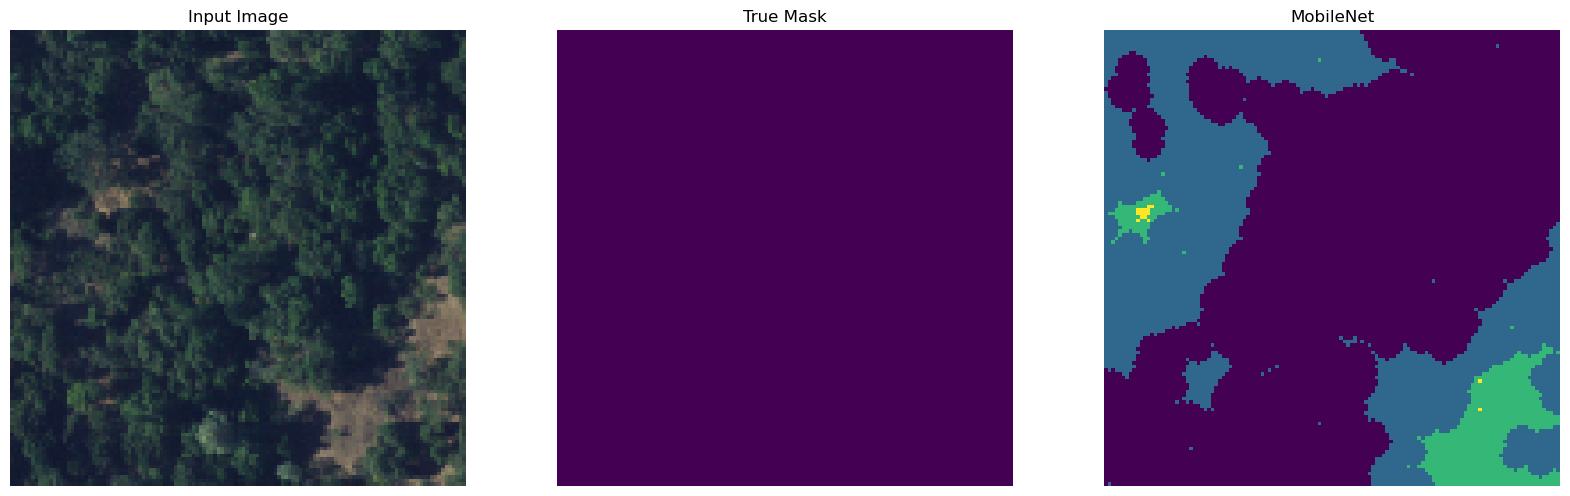

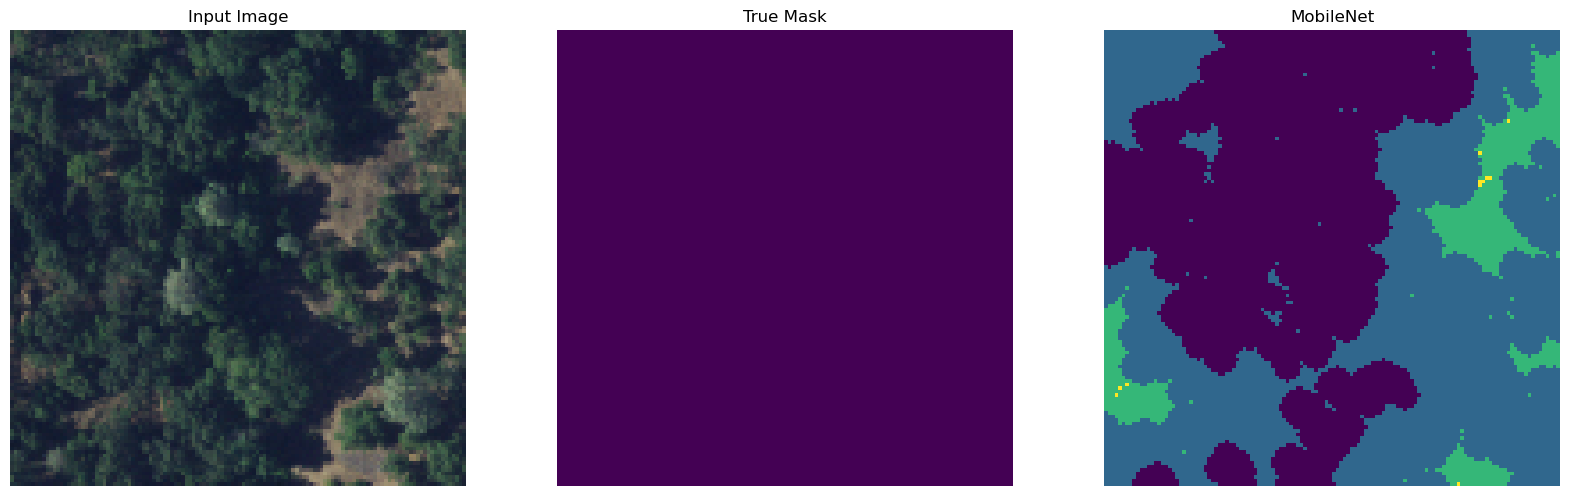

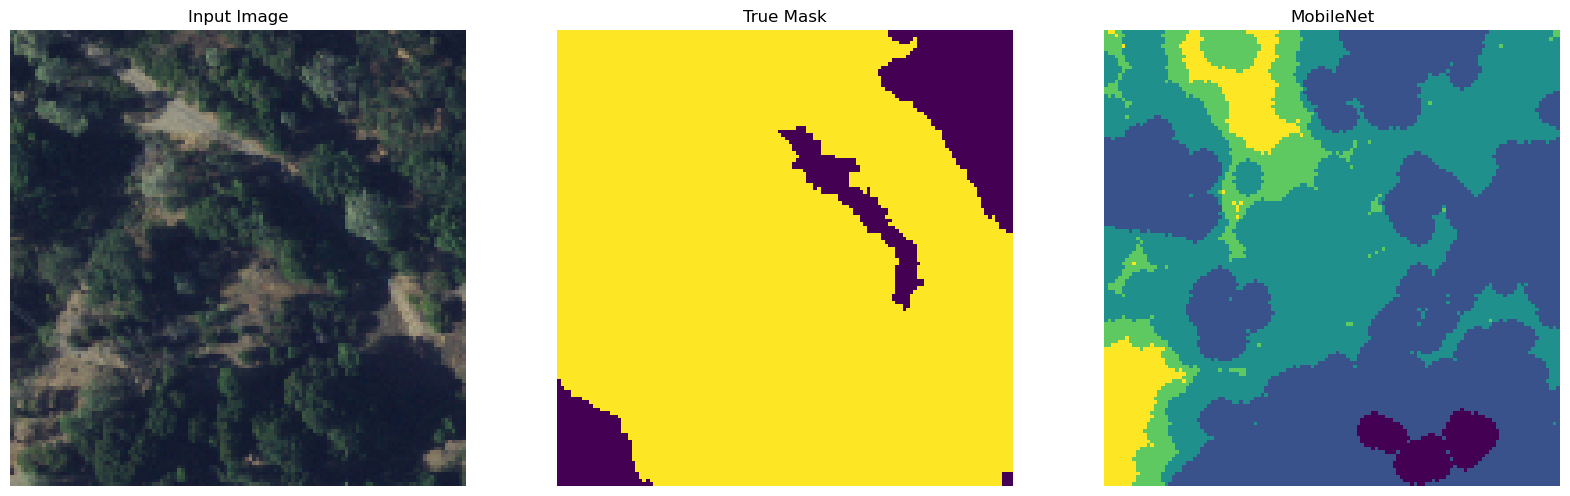

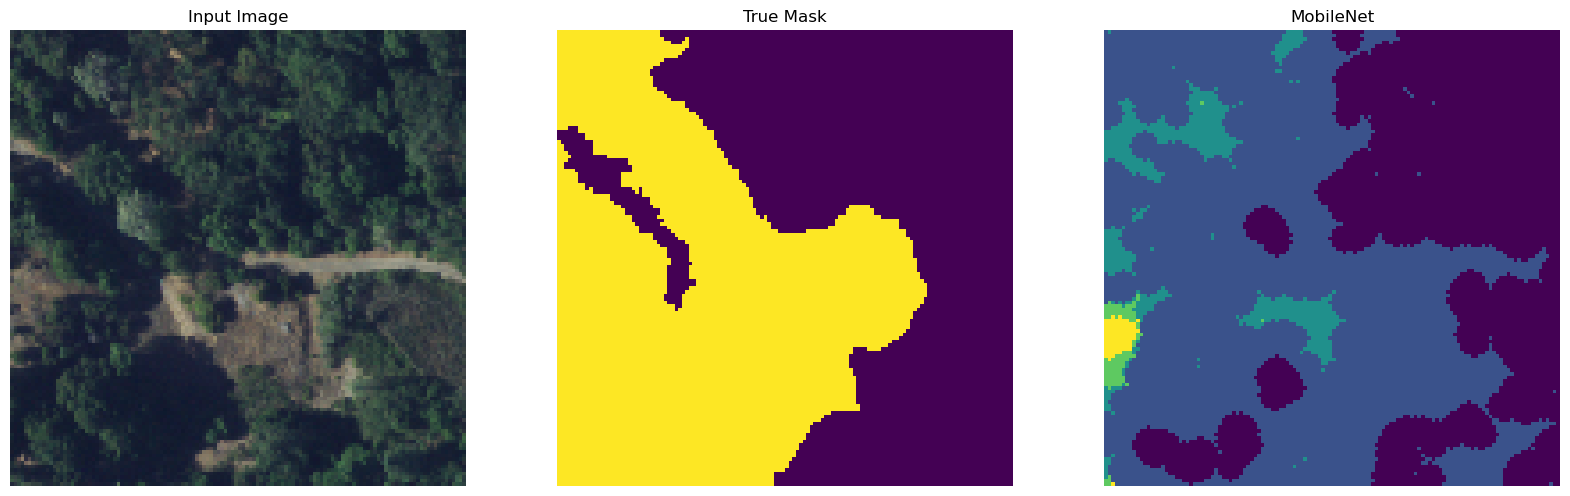

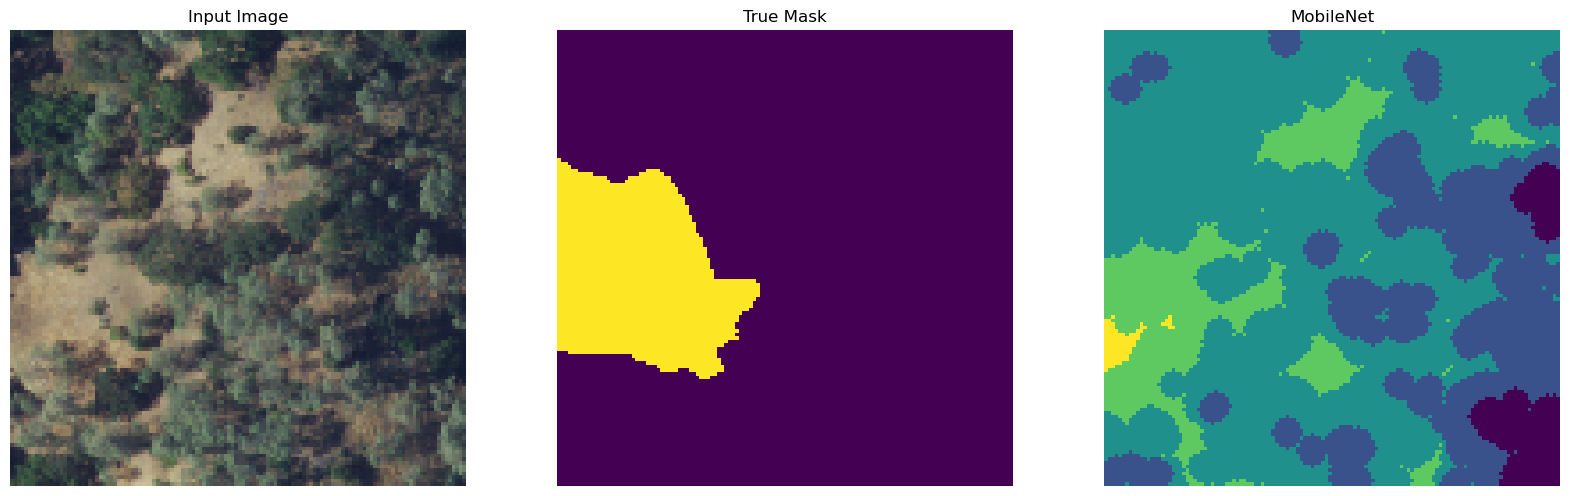

In [19]:
hp.show_predictions(model_mobile, test_images[100:105], test_labels[100:105], 5, "MobileNet")

In [21]:
model_mobile.save('mobilenet_seg_model_full_6class_NunsTubbs.tf', overwrite=True)

INFO:tensorflow:Assets written to: mobilenet_seg_model_full_6class_NunsTubbs.tf\assets


INFO:tensorflow:Assets written to: mobilenet_seg_model_full_6class_NunsTubbs.tf\assets


In [20]:
keras.backend.clear_session()
model_deeplab = hp.DeeplabV3Plus(image_size=128, num_classes=6, weight=class_weights)
model_deeplab.summary()
gc.collect()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

360

In [21]:
dlab_history = model_deeplab.fit(train_images, train_labels, epochs=50, batch_size=32,
                                 validation_data=(test_images, test_labels),
                                 callbacks=callbacks, shuffle=True)

Epoch 1/50
744/744 [==============================] - 63s 79ms/step - loss: 0.9777 - accuracy: 0.4075 - mean_io_u: 0.2047 - val_loss: 30.3017 - val_accuracy: 0.2319 - val_mean_io_u: 0.0561
Epoch 2/50
744/744 [==============================] - 57s 76ms/step - loss: 0.6782 - accuracy: 0.5745 - mean_io_u: 0.3132 - val_loss: 1.1072 - val_accuracy: 0.4735 - val_mean_io_u: 0.3008
Epoch 3/50
744/744 [==============================] - 57s 76ms/step - loss: 0.6223 - accuracy: 0.6011 - mean_io_u: 0.3358 - val_loss: 1.1412 - val_accuracy: 0.4547 - val_mean_io_u: 0.2896
Epoch 4/50
744/744 [==============================] - 57s 76ms/step - loss: 0.5744 - accuracy: 0.6231 - mean_io_u: 0.3569 - val_loss: 1.1401 - val_accuracy: 0.4629 - val_mean_io_u: 0.2944
Epoch 5/50
744/744 [==============================] - 57s 76ms/step - loss: 0.5373 - accuracy: 0.6372 - mean_io_u: 0.3738 - val_loss: 1.1820 - val_accuracy: 0.4598 - val_mean_io_u: 0.2932
Epoch 6/50
744/744 [==============================] - 57s 7

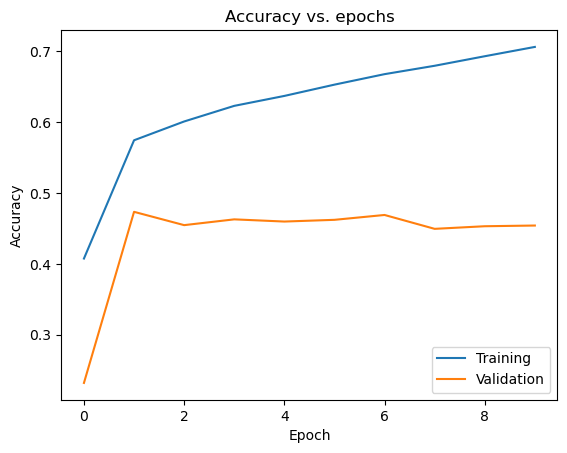

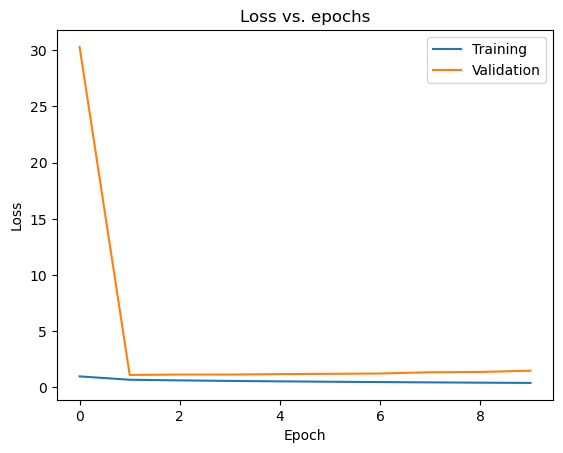

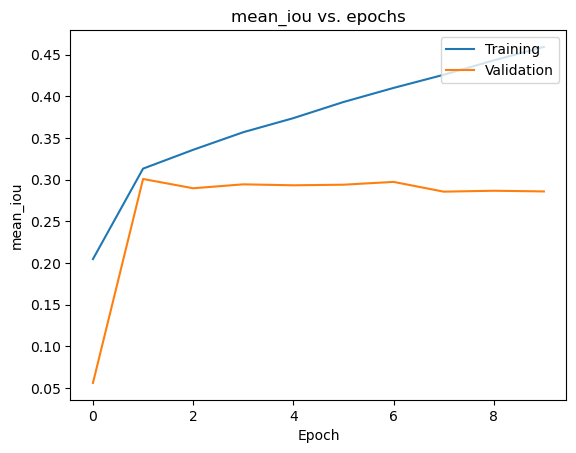

In [22]:
hp.plot_accuracy(dlab_history)
hp.plot_loss(dlab_history)
hp.plot_meaniou(dlab_history)

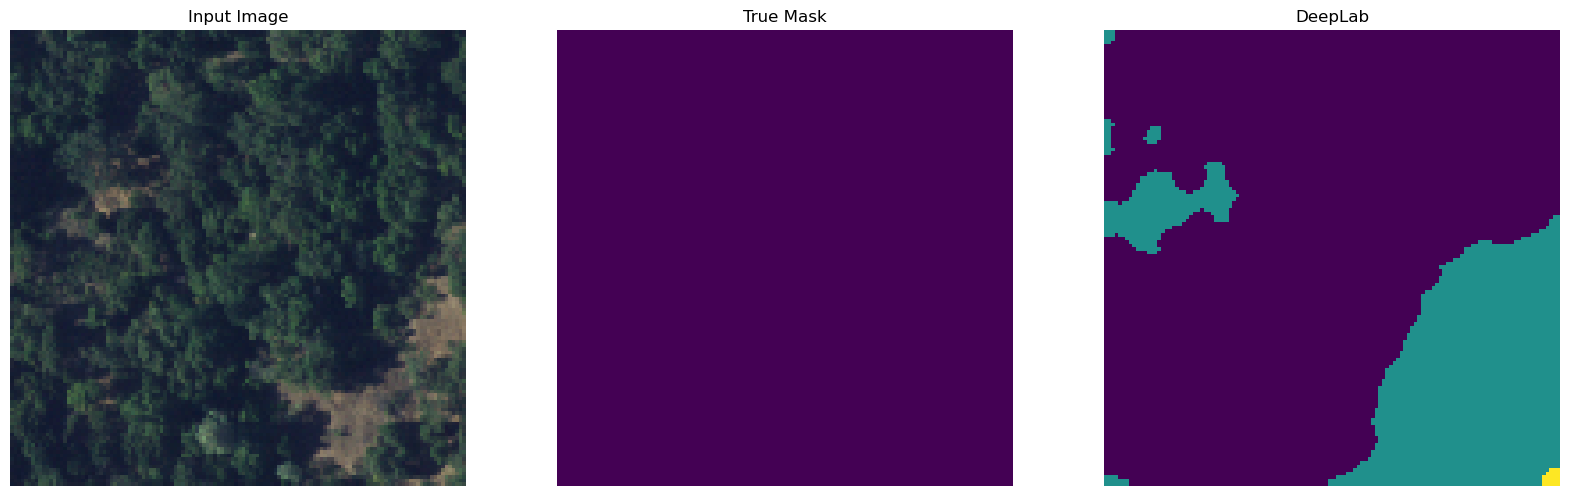

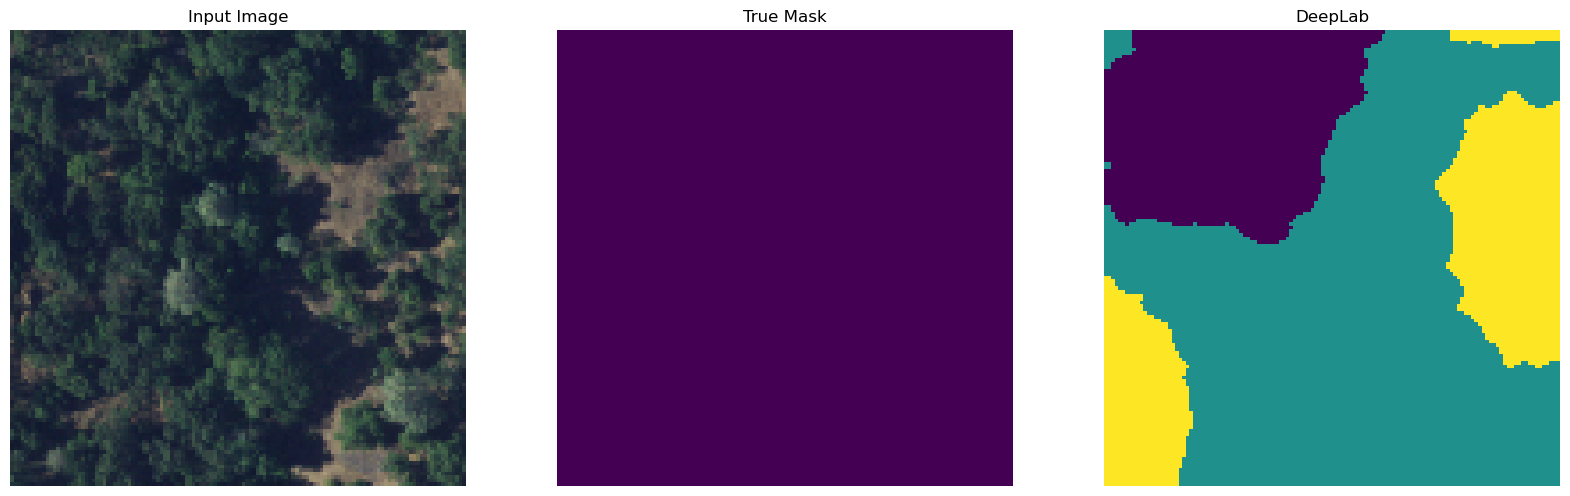

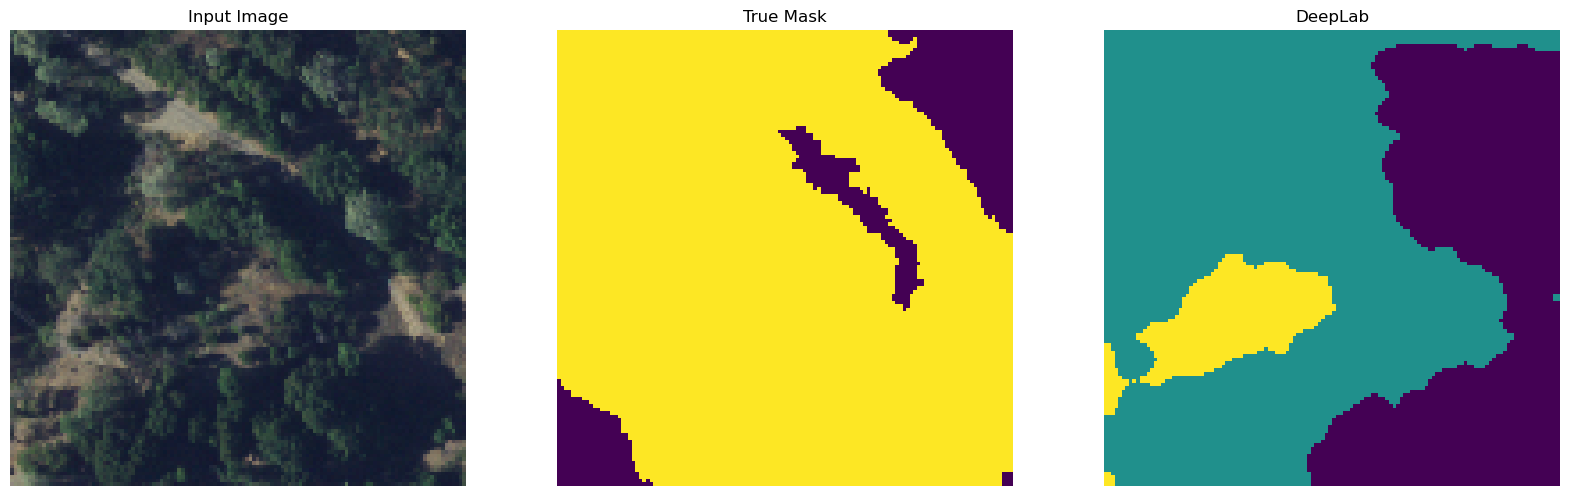

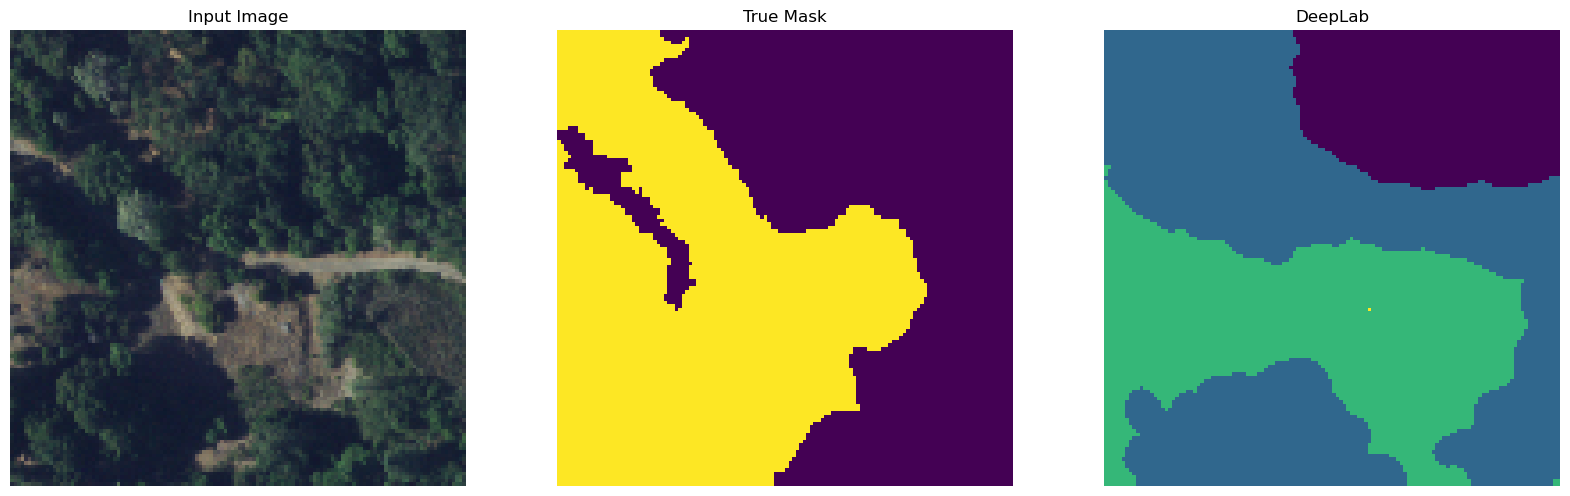

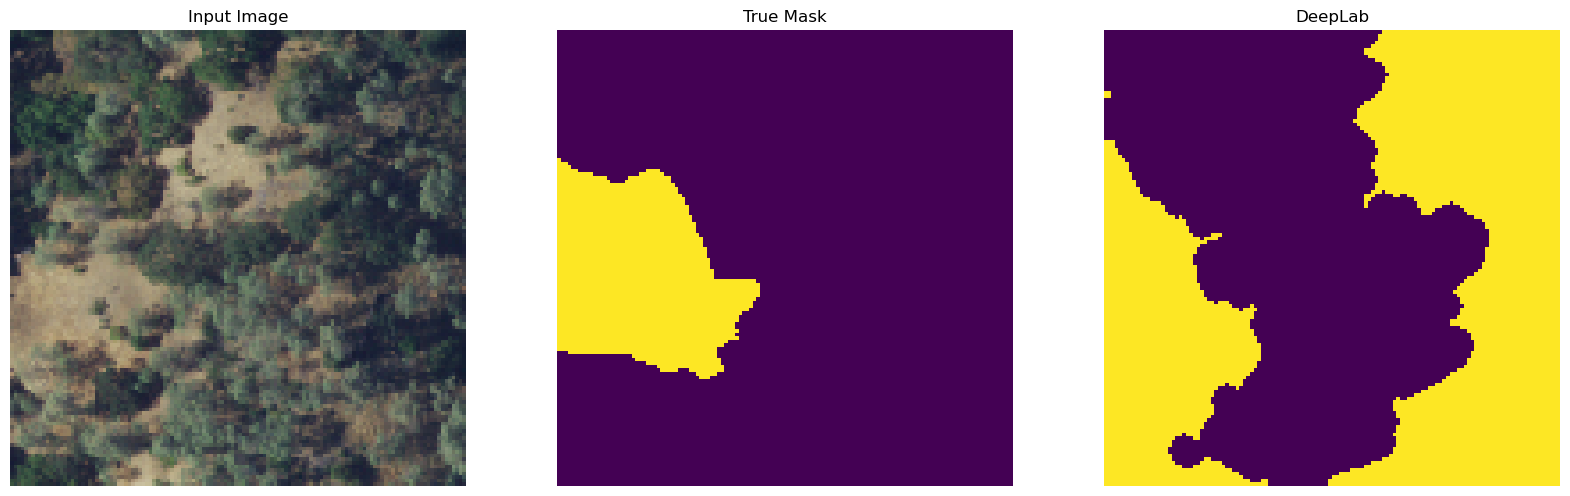

In [23]:
hp.show_predictions(model_deeplab, test_images[100:105], test_labels[100:105], 5, "DeepLab")

In [26]:
model_deeplab.save('deeplabv3_seg_model_full_6class_NunsTubbs.tf', overwrite=True)

INFO:tensorflow:Assets written to: deeplabv3_seg_model_full_6class_NunsTubbs.tf\assets


INFO:tensorflow:Assets written to: deeplabv3_seg_model_full_6class_NunsTubbs.tf\assets


In [30]:
gc.collect()
del model_deeplab
del model_mobile
del model

NameError: name 'model_deeplab' is not defined

In [6]:
final_images = np.concatenate((train_images, test_images), axis=0)
final_labels = np.concatenate((train_labels, test_labels), axis=0)

In [7]:
del train_labels
del train_images
del test_labels
del test_images

In [8]:
print(final_images, final_labels.shape)

(30994, 128, 128, 3) (30994, 128, 128)


In [5]:
gc.collect()

0

In [6]:
# gc.collect()
# svote_mask_tubbs = hp.voting(['deeplabv3_seg_model_full_6class_NunsTubbs.tf','deeplabv3_seg_model_full_6class_PocketTubbs.tf','deeplabv3_seg_model_full_6class_PocketNuns.tf',
#                         'mobilenet_seg_model_full_6class_NunsTubbs.tf','mobilenet_seg_model_full_6class_PocketNuns.tf','mobilenet_seg_model_full_6class_PocketTubbs.tf',
#                         'simple_seg_model_full_6class_NunsTubbs.tf','simple_seg_model_full_6class_PocketNuns.tf', 'simple_seg_model_full_6class_PocketTubbs.tf' ],
#                        Tubbs_images, Tubbs_labels, offset=25, num=5)

deeplabv3_seg_model_full_6class_NunsTubbs.tf
deeplabv3_seg_model_full_6class_PocketTubbs.tf
deeplabv3_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_NunsTubbs.tf
mobilenet_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_PocketTubbs.tf
simple_seg_model_full_6class_NunsTubbs.tf
simple_seg_model_full_6class_PocketNuns.tf
simple_seg_model_full_6class_PocketTubbs.tf
s_voting
0.42766634


In [6]:
gc.collect()
svote_mask_tubbs = hp.voting(['deeplabv3_seg_model_full_6class_PocketNuns.tf',
                        'mobilenet_seg_model_full_6class_PocketNuns.tf',
                        'simple_seg_model_full_6class_PocketNuns.tf'],
                       Tubbs_images, Tubbs_labels, offset=25, num=5)

deeplabv3_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_PocketNuns.tf
simple_seg_model_full_6class_PocketNuns.tf
s_voting
0.33018968


In [8]:
# gc.collect()
# svote_mask_Pocket = hp.voting(['deeplabv3_seg_model_full_6class_NunsTubbs.tf','deeplabv3_seg_model_full_6class_PocketTubbs.tf','deeplabv3_seg_model_full_6class_PocketNuns.tf',
#                         'mobilenet_seg_model_full_6class_NunsTubbs.tf','mobilenet_seg_model_full_6class_PocketNuns.tf','mobilenet_seg_model_full_6class_PocketTubbs.tf',
#                         'simple_seg_model_full_6class_NunsTubbs.tf','simple_seg_model_full_6class_PocketNuns.tf', 'simple_seg_model_full_6class_PocketTubbs.tf' ],
#                        Pocket_images, Pocket_labels, offset=25, num=5)

deeplabv3_seg_model_full_6class_NunsTubbs.tf
deeplabv3_seg_model_full_6class_PocketTubbs.tf
deeplabv3_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_NunsTubbs.tf
mobilenet_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_PocketTubbs.tf
simple_seg_model_full_6class_NunsTubbs.tf
simple_seg_model_full_6class_PocketNuns.tf
simple_seg_model_full_6class_PocketTubbs.tf
s_voting
0.43943903


In [7]:
gc.collect()
svote_mask_Pocket = hp.voting(['deeplabv3_seg_model_full_6class_NunsTubbs.tf',
                        'mobilenet_seg_model_full_6class_NunsTubbs.tf',
                        'simple_seg_model_full_6class_NunsTubbs.tf' ],
                       Pocket_images, Pocket_labels, offset=25, num=5)

deeplabv3_seg_model_full_6class_NunsTubbs.tf
mobilenet_seg_model_full_6class_NunsTubbs.tf
simple_seg_model_full_6class_NunsTubbs.tf
s_voting
0.3443286


In [10]:
# gc.collect()
# svote_mask_Nuns = hp.voting(['deeplabv3_seg_model_full_6class_NunsTubbs.tf','deeplabv3_seg_model_full_6class_PocketTubbs.tf','deeplabv3_seg_model_full_6class_PocketNuns.tf',
#                         'mobilenet_seg_model_full_6class_NunsTubbs.tf','mobilenet_seg_model_full_6class_PocketNuns.tf','mobilenet_seg_model_full_6class_PocketTubbs.tf',
#                         'simple_seg_model_full_6class_NunsTubbs.tf','simple_seg_model_full_6class_PocketNuns.tf', 'simple_seg_model_full_6class_PocketTubbs.tf' ],
#                        Nuns_images, Nuns_labels, offset=25, num=5)

deeplabv3_seg_model_full_6class_NunsTubbs.tf
deeplabv3_seg_model_full_6class_PocketTubbs.tf
deeplabv3_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_NunsTubbs.tf
mobilenet_seg_model_full_6class_PocketNuns.tf
mobilenet_seg_model_full_6class_PocketTubbs.tf
simple_seg_model_full_6class_NunsTubbs.tf
simple_seg_model_full_6class_PocketNuns.tf
simple_seg_model_full_6class_PocketTubbs.tf
s_voting
0.33543143


In [8]:
gc.collect()
svote_mask_Nuns = hp.voting(['deeplabv3_seg_model_full_6class_PocketTubbs.tf',
                        'mobilenet_seg_model_full_6class_PocketTubbs.tf',
                         'simple_seg_model_full_6class_PocketTubbs.tf' ],
                       Nuns_images, Nuns_labels, offset=25, num=5)

deeplabv3_seg_model_full_6class_PocketTubbs.tf
mobilenet_seg_model_full_6class_PocketTubbs.tf
simple_seg_model_full_6class_PocketTubbs.tf
s_voting
0.28059795


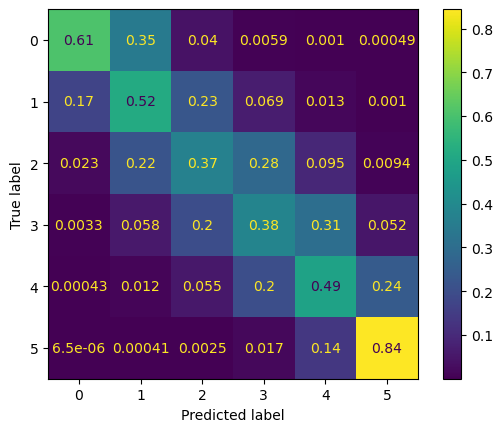

In [9]:
flat_preds = np.concatenate(svote_mask_tubbs).flatten()
flat_truth = np.concatenate(Tubbs_labels).flatten()
OUTPUT_CHANNELS = 6
cm = confusion_matrix(flat_truth, flat_preds, labels=list(range(OUTPUT_CHANNELS)))
ConfusionMatrixDisplay.from_predictions(flat_truth, flat_preds, normalize='true')

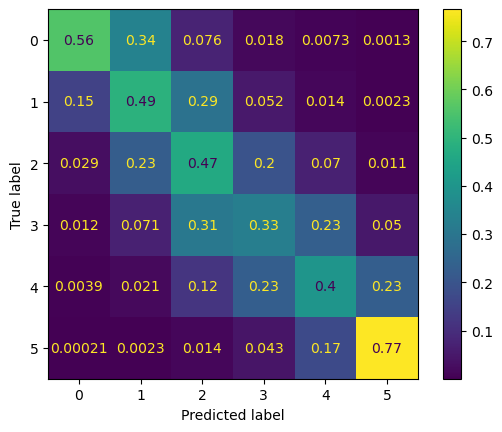

In [10]:
gc.collect()
flat_preds = np.concatenate(svote_mask_Pocket).flatten()
flat_truth = np.concatenate(Pocket_labels).flatten()
OUTPUT_CHANNELS = 6
cm = confusion_matrix(flat_truth, flat_preds, labels=list(range(OUTPUT_CHANNELS)))
ConfusionMatrixDisplay.from_predictions(flat_truth, flat_preds, normalize='true')

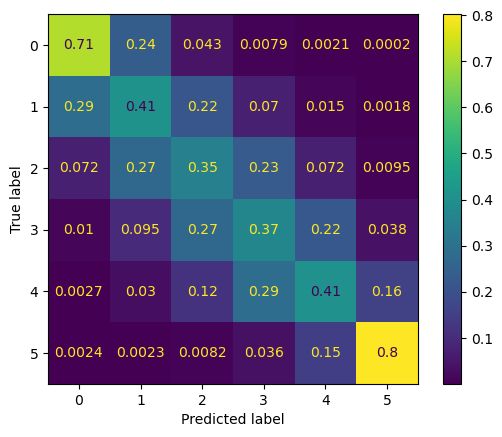

In [11]:
gc.collect()
flat_preds = np.concatenate(svote_mask_Nuns).flatten()
flat_truth = np.concatenate(Nuns_labels).flatten()
OUTPUT_CHANNELS = 6
cm = confusion_matrix(flat_truth, flat_preds, labels=list(range(OUTPUT_CHANNELS)))
ConfusionMatrixDisplay.from_predictions(flat_truth, flat_preds, normalize='true')

In [12]:
#final_images = np.concatenate(Pocket_images,Tubbs_images,Nuns_images, axis =0)
final_labels = np.concatenate((Pocket_labels,Tubbs_labels,Nuns_labels), axis =0)
svote_mask_final = np.concatenate((svote_mask_Pocket,svote_mask_tubbs,svote_mask_Nuns), axis = 0)

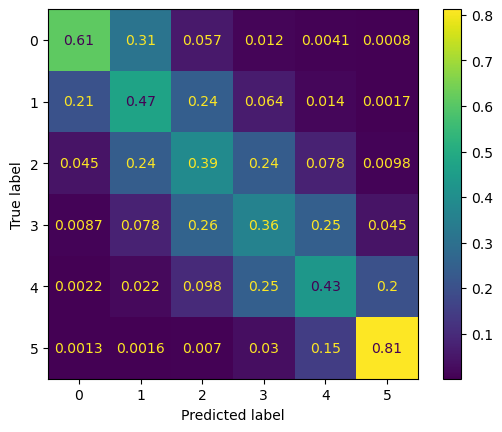

In [13]:
gc.collect()
flat_preds = np.concatenate(svote_mask_final).flatten()
flat_truth = np.concatenate(final_labels).flatten()
OUTPUT_CHANNELS = 6
cm = confusion_matrix(flat_truth, flat_preds, labels=list(range(OUTPUT_CHANNELS)))
ConfusionMatrixDisplay.from_predictions(flat_truth, flat_preds, normalize='true')

In [14]:
np.unique(final_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([ 58714287,  75771302,  58164755,  41895012,  39142878, 234117462],
       dtype=int64))

In [15]:
svote_mask_final_bin = np.copy(svote_mask_final)
final_labels_bin = np.copy(final_labels)

In [16]:
flat_preds = np.concatenate(svote_mask_final_bin).flatten()
flat_truth = np.concatenate(final_labels_bin).flatten()

In [17]:
print(np.unique(flat_preds))
print(np.unique(flat_truth))

[0 1 2 3 4 5]
[0 1 2 3 4 5]


In [18]:
preds0 = np.where(flat_preds==0)
preds12 = np.where((flat_preds==1) | (flat_preds==2))
preds34 = np.where((flat_preds==3) | (flat_preds==4))
preds5 = np.where(flat_preds==5)

In [51]:
print(preds34)
print(preds5)
print(preds12)
print(preds0)

(array([    16444,     16445,     16446, ..., 507729404, 507729405,
       507729406], dtype=int64),)
(array([   196608,    196609,    196610, ..., 507805693, 507805694,
       507805695], dtype=int64),)
(array([        0,         1,         2, ..., 507007489, 507007491,
       507007617], dtype=int64),)
(array([   114693,    114694,    114695, ..., 502103980, 502103981,
       502103982], dtype=int64),)


In [19]:
flat_preds[preds0]=0
flat_preds[preds12]=1
flat_preds[preds34]=2
flat_preds[preds5]=3

In [20]:
truth0 = np.where((flat_truth == 0))
truth12 = np.where((flat_truth == 1) | (flat_truth == 2))
truth34 = np.where((flat_truth == 3) | (flat_truth == 4))
truth5 = np.where((flat_truth == 5))
flat_truth[truth0]=0
flat_truth[truth12] = 1
flat_truth[truth34] = 2
flat_truth[truth5] = 3

In [21]:
print(flat_truth.shape)

(507805696,)


In [22]:
print(flat_preds.shape)

(507805696,)


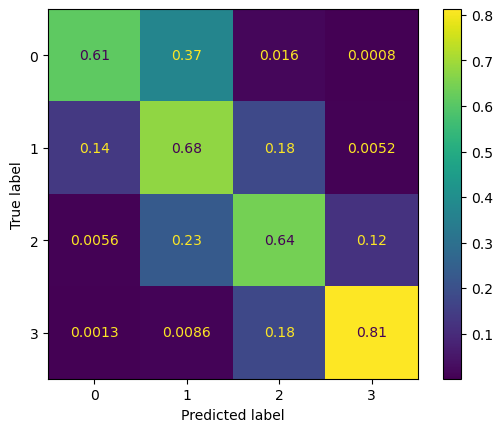

In [23]:
gc.collect()
# flat_preds = np.concatenate(svote_mask_final_bin).flatten()
# flat_truth = np.concatenate(final_labels_bin).flatten()
OUTPUT_CHANNELS = 4
cm = confusion_matrix(flat_truth, flat_preds, labels=list(range(OUTPUT_CHANNELS)))
ConfusionMatrixDisplay.from_predictions(flat_truth, flat_preds, normalize='true')

In [ ]:
Class   Damage
0	    <%5
1 	    5%-20%
2	    20%-40%
3	    40%-60%
4	    60%-80%
5	    80%-100%